In [1]:
import pandas as pd
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
""" Instructions: Replace the path variable to point to your CSV file. See the last cell 
to update the df_columns variable to optimize layout"""

# replace with your path
path = "alignment.csv"

In [3]:
def getName(string):
    """Google forms will format the names as `Align yourself[name]`, 
    or whatever your question header is"""
    tokens = string.split("[")
    return tokens[-1][:-1]

In [4]:
df = pd.read_csv(path).drop(columns=["Timestamp"])
df = shuffle(df)
df = df.reset_index(drop=True)
for col in df.columns:
    column = getName(col)
    df[column] = df[col]
    df = df.drop(columns=[col])

In [5]:
df

,Amy,Bert,Chan,Dan,Eggbert,Fan,Gary,Hermione,Ilah
0,chaotic evil,neutral evil,lawful evil,true neutral,chaotic neutral,lawful neutral,chaotic good,neutral good,lawful good
1,neutral evil,lawful neutral,chaotic evil,neutral good,lawful evil,true neutral,chaotic good,chaotic neutral,lawful good
2,chaotic neutral,neutral good,chaotic good,lawful evil,neutral evil,lawful neutral,true neutral,chaotic evil,lawful good
3,lawful neutral,chaotic good,neutral evil,true neutral,chaotic neutral,neutral good,chaotic evil,lawful evil,lawful good
4,chaotic good,neutral good,true neutral,lawful evil,neutral evil,lawful neutral,chaotic neutral,chaotic evil,lawful good
5,chaotic evil,true neutral,lawful evil,neutral good,lawful neutral,neutral evil,chaotic neutral,chaotic good,lawful good
6,lawful evil,neutral good,lawful good,true neutral,chaotic good,chaotic neutral,chaotic evil,neutral evil,lawful neutral


In [6]:
categories = np.array([["lawful good", "neutral good", "chaotic good"],
             ["lawful neutral", "true neutral", "chaotic neutral"],
             ["lawful evil", "neutral evil", "chaotic evil"]])

In [7]:
def get_indices(category):
    """For any category such as `lawful neutral`, finds the index
    in which it's located in the categories matrix"""
    for i in range(categories.shape[0]):
        for j in range(categories.shape[1]):
            if categories[i,j] == category:
                return i,j
    return -1

def get_matrix(categories_list):
    """Given a person's categories, gets the matrix representation"""
    a = np.zeros((3,3))
    for string in categories_list:
        indices = get_indices(string)
        a[indices] += 1
    return a

In [8]:
verbose = True

mats = {}
for col in df.columns:
    matrix = get_matrix(list(df[col]))
    mats[col] = matrix
    if verbose:
        print(col)
        print(matrix)


Amy
[[0. 0. 1.]
 [1. 0. 1.]
 [1. 1. 2.]]
Bert
[[0. 3. 1.]
 [1. 1. 0.]
 [0. 1. 0.]]
Chan
[[1. 0. 1.]
 [0. 1. 0.]
 [2. 1. 1.]]
Dan
[[0. 2. 0.]
 [0. 3. 0.]
 [2. 0. 0.]]
Eggbert
[[0. 0. 1.]
 [1. 0. 2.]
 [1. 2. 0.]]
Fan
[[0. 1. 0.]
 [3. 1. 1.]
 [0. 1. 0.]]
Gary
[[0. 0. 2.]
 [0. 1. 2.]
 [0. 0. 2.]]
Hermione
[[0. 1. 1.]
 [0. 0. 1.]
 [1. 1. 2.]]
Ilah
[[6. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]


[['lawful good' 'neutral good' 'chaotic good']
 ['lawful neutral' 'true neutral' 'chaotic neutral']
 ['lawful evil' 'neutral evil' 'chaotic evil']]


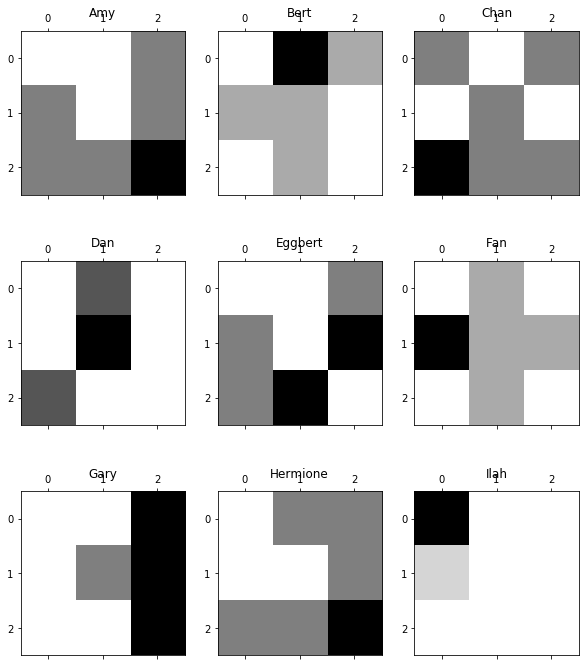

In [12]:
df_columns = None
# Set df_columns to your desired ordering, example below. Replace with corresponding names
# df_columns = ['Ilah', 'Bert', 'Gary', 'Fan', 'Dan', 'Eggbert', 'Chan', 'Amy', 'Hermione']

fig, ax = plt.subplots(3,3,figsize=(10,12))
p = 0
print(categories)
for i in range(3):
    for j in range(3):
        if df_columns:
            person = df_columns[p]
        else:
            person = df.columns[p]
        ax[i,j].matshow(mats[person], cmap=plt.cm.gray_r)
        ax[i]
        ax[i,j].set_title(person)
        p+=1
plt.show()